In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.fftpack import fft
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [9]:
fhg_raw_data = pd.read_csv('bhg_2017-01-26_09:52:45.csv', infer_datetime_format=True)
#fhg_data = fhg_raw_data[17:605]
#fhg_data = fhg_data.reset_index(drop=True)
#fhg_data['isShot'] = -1
#training_coords = [6,36,42,72,86,115,132,163,177,209,221]
#start_pos = 0
#for c in training_coords:
#    shot_val = training_coords.index(c) % 2
#    fhg_data.ix[start_pos:c+1, 'isShot'] = shot_val
#    start_pos = c+1

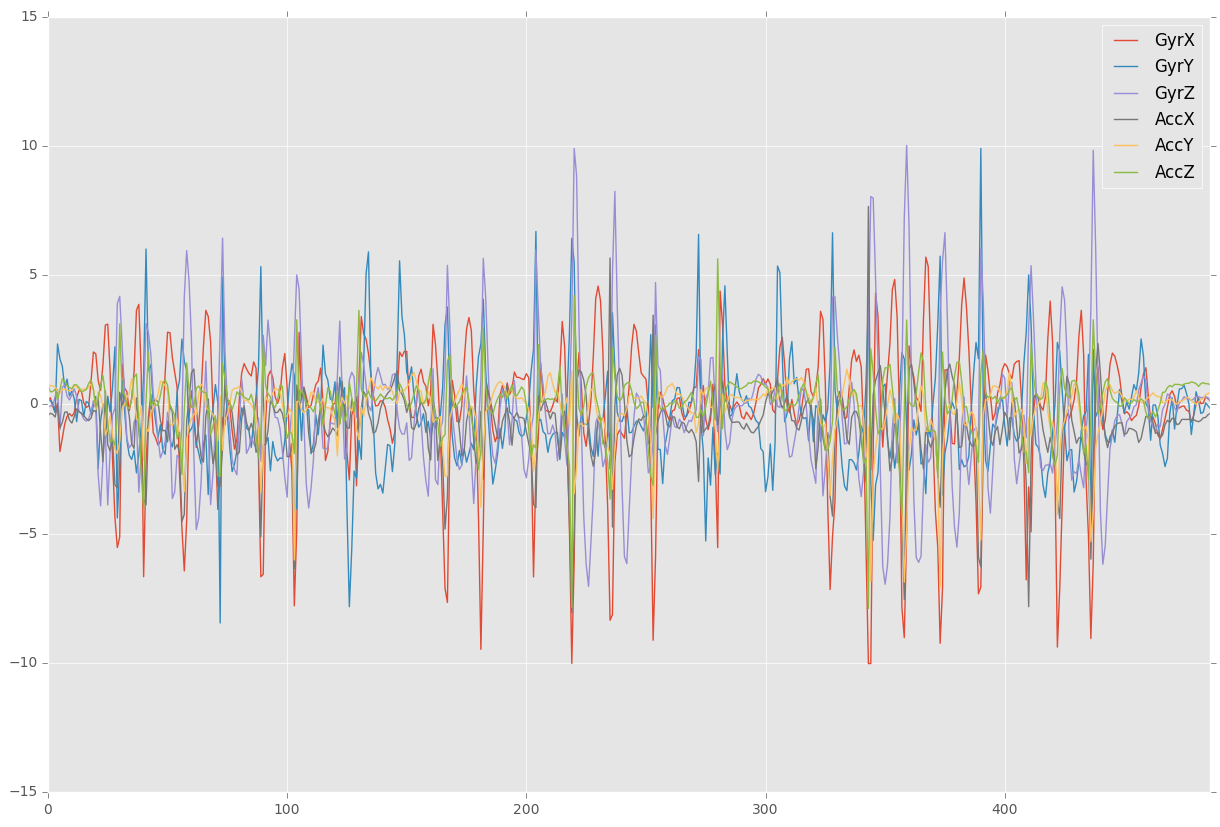

In [10]:
fhg_raw_data.plot(figsize=(15, 10))

In [3]:
training_data = fhg_data.loc[fhg_data['isShot'] != -1]
training_data = training_data.iloc[:, 1:8]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(training_data.iloc[:, 0:6], training_data.iloc[:, 6], test_size=0.4, random_state=42)

In [5]:
clf = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [6]:
confusion_matrix(training_data.iloc[:, 6], clf.predict(training_data.iloc[:, 0:6]))

array([[ 64,   7],
       [  4, 148]])

In [7]:
fhg_data['isShotPred'] = clf.predict(fhg_data.iloc[:, 1:7])

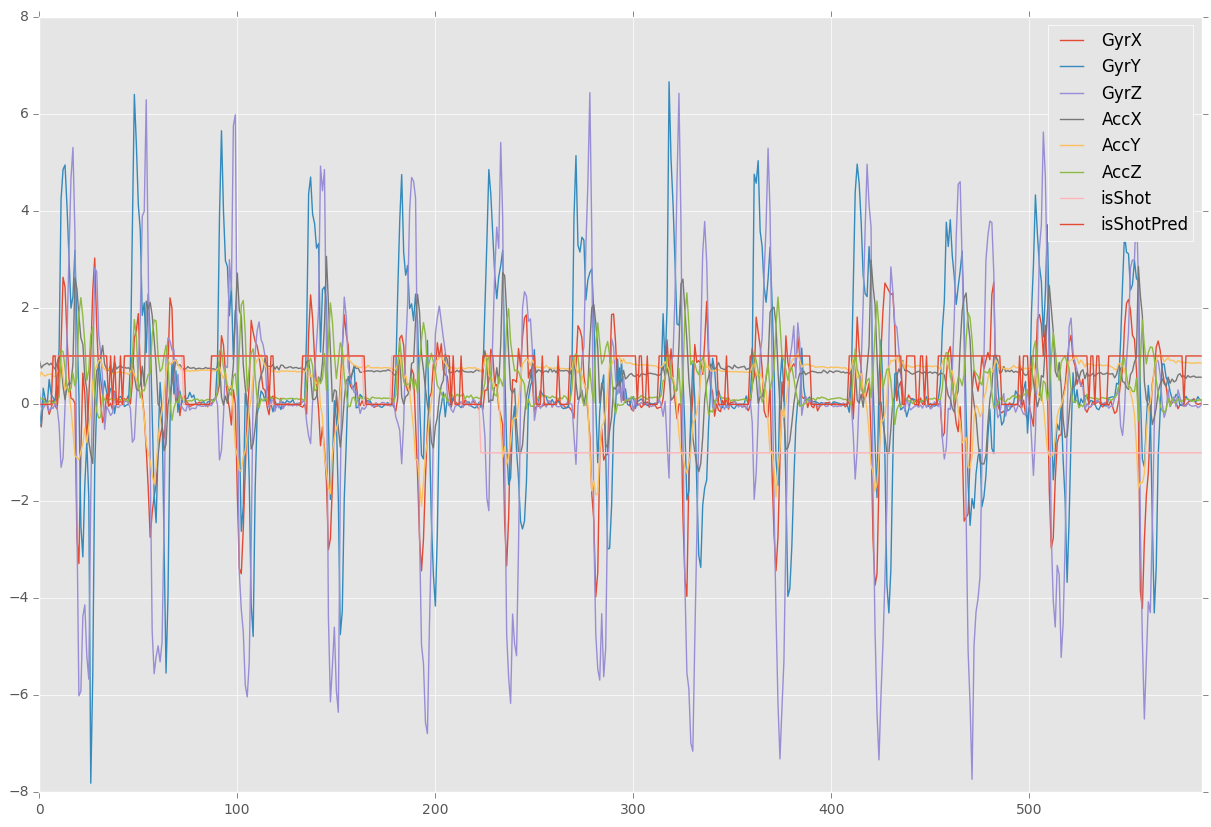

In [9]:
fhg_data.plot(figsize=(15, 10))

__FFT for AccX__

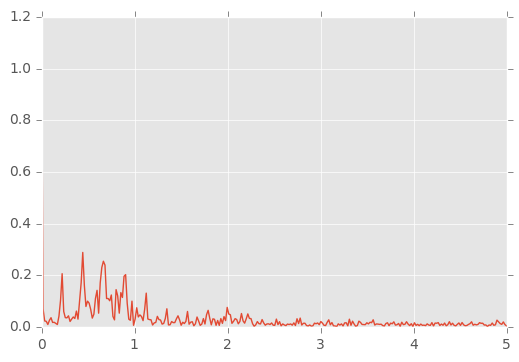

In [78]:
sampling_rate = 1.0/10.0
imu_signal = fhg_data['AccX']
N = len(imu_signal)
yf = fft(imu_signal)
xf = np.linspace(0.0, 1.0/(2.0*sampling_rate), N/2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
plt.show()

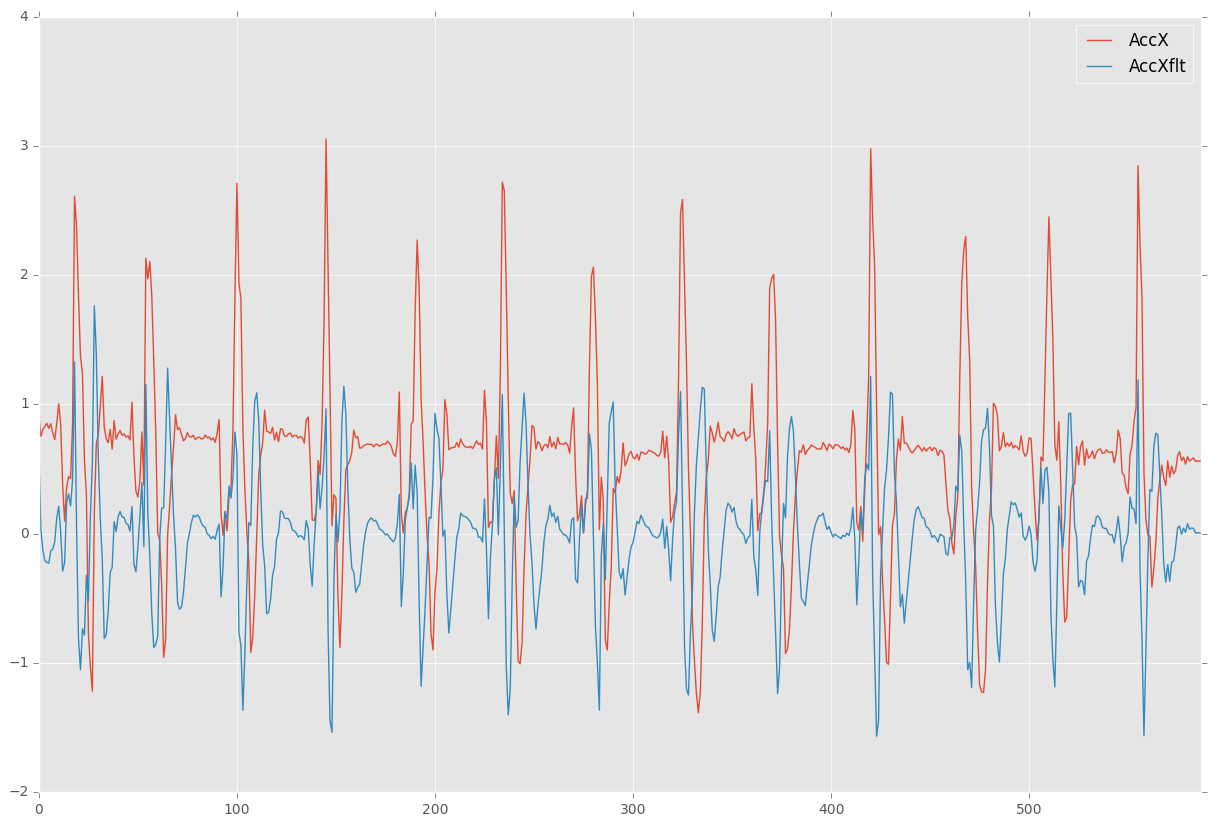

In [88]:
b, a = signal.iirfilter(3, [0.1/5.0], rs=60, btype='highpass', analog=False, ftype='cheby2')
fhg_data['AccXflt'] = signal.lfilter(b, a, imu_signal)
fhg_data[['AccX','AccXflt']].plot(figsize=(15, 10))

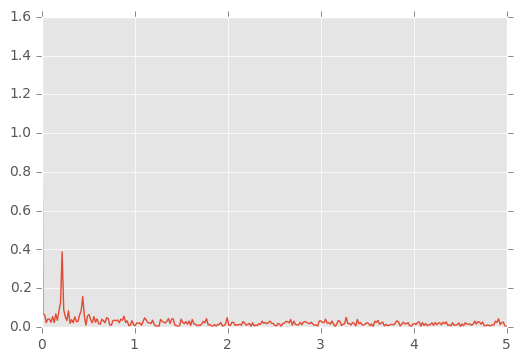

In [10]:
sampling_rate = 1.0/10.0
imu_signal = fhg_data['isShotPred']
N = len(imu_signal)
yf = fft(imu_signal)
xf = np.linspace(0.0, 1.0/(2.0*sampling_rate), N/2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
plt.show()

In [67]:
from scipy import signal
#b, a = signal.butter(4, 0.3/5.0, 'high', False)
#b, a = signal.cheby1(5, 4, 0.35/5.0, 'low', analog=False)
b, a = signal.ellip(1, 2, 30, 0.35/5.0, 'low', analog=False)
#fhg_data['isShotPredFiltered'] = np.round(signal.lfilter(b, a, imu_signal) * 1)
fhg_data['isShotPredFiltered'] = signal.lfilter(b, a, imu_signal)
#fhg_data.plot(figsize=(15, 10))

(-2, 2)

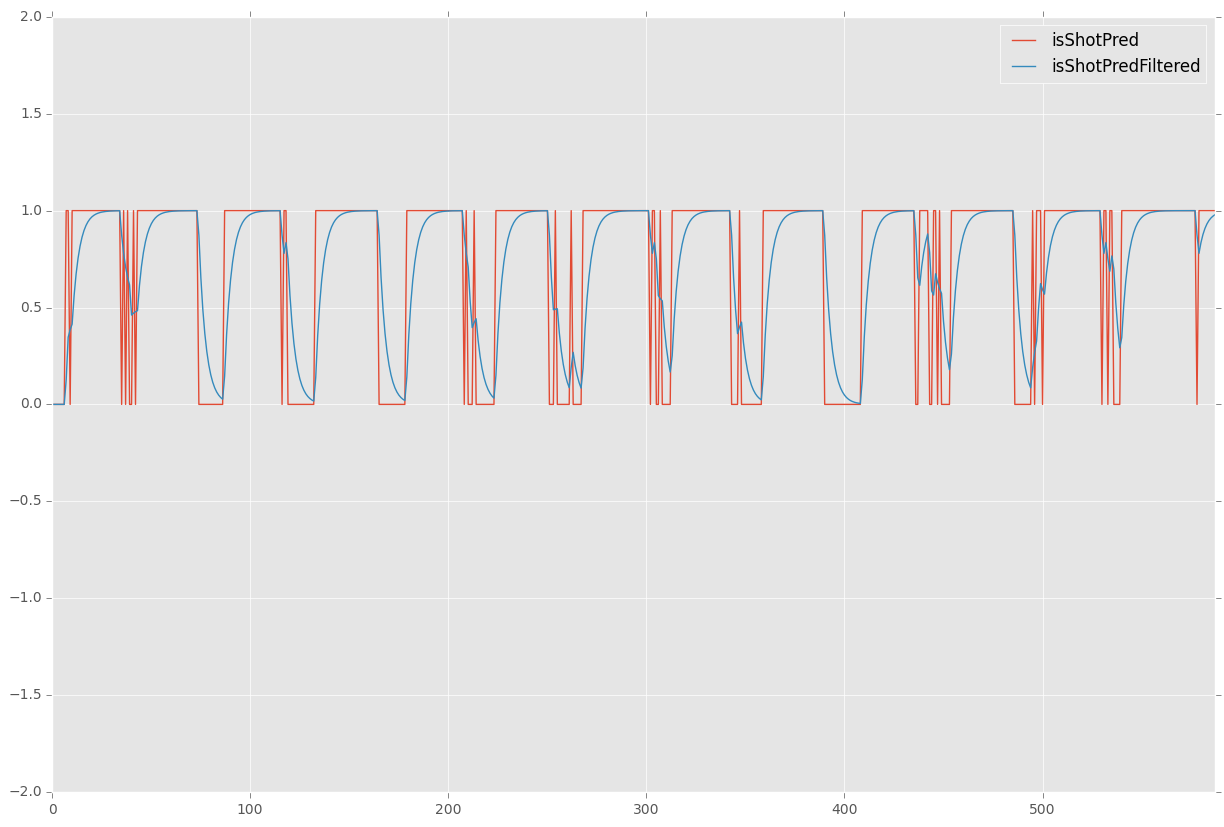

In [68]:
ax1 = fhg_data[['isShotPred','isShotPredFiltered']].plot(figsize=(15, 10))
ax1.set_ylim(-2,2)

In [ ]:
np.round(signal.lfilter(b, a, imu_signal) * 100000)